## Below is the approach that I mentioned during the Zoom meeting and transitioned to treasuries since I don't have data on swaps (no longer a Warwick student => no more access to Bloomberg)

## The work: Me + Chat GPT + Youtube videos. That is it.

## I started coding around noon yesterday (now it is 4:37 am), so I'd say it's a day's work.

## That being said, I wanted to be fast, and while I understand what I have done for myself, I can imagine a reader wondering, "What df is this one now?". I will clean up if required, but the file works. Please change the paths to the CSV files. Please Run All and maybe lower the arguments in ARIMA for speed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\daily-treasury-rates.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df = df.asfreq(pd.infer_freq(df.index))
df = df.dropna()
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2024-08-01,5.55,5.46,5.37,5.28,5.08,4.62,4.16,3.96,3.84,3.89,3.99,4.35,4.27
2024-08-02,5.54,5.43,5.29,5.14,4.88,4.33,3.88,3.70,3.62,3.68,3.80,4.19,4.11
2024-08-05,5.52,5.43,5.35,5.14,4.91,4.34,3.89,3.71,3.62,3.66,3.78,4.16,4.06
2024-08-06,5.50,5.43,5.34,5.18,5.00,4.46,3.99,3.76,3.73,3.79,3.90,4.28,4.18
2024-08-07,5.50,5.43,5.34,5.21,4.99,4.45,4.00,3.81,3.79,3.85,3.96,4.35,4.26
2024-08-08,5.55,5.42,5.34,5.21,5.01,4.48,4.04,3.86,3.83,3.89,3.99,4.38,4.28
2024-08-09,5.54,5.40,5.33,5.22,5.02,4.50,4.05,3.86,3.80,3.85,3.94,4.33,4.23
2024-08-12,5.53,5.40,5.33,5.20,5.02,4.47,4.01,3.82,3.75,3.80,3.90,4.30,4.19
2024-08-13,5.48,5.39,5.32,5.18,4.97,4.40,3.93,3.75,3.68,3.74,3.85,4.25,4.16


## 2 Days PCA

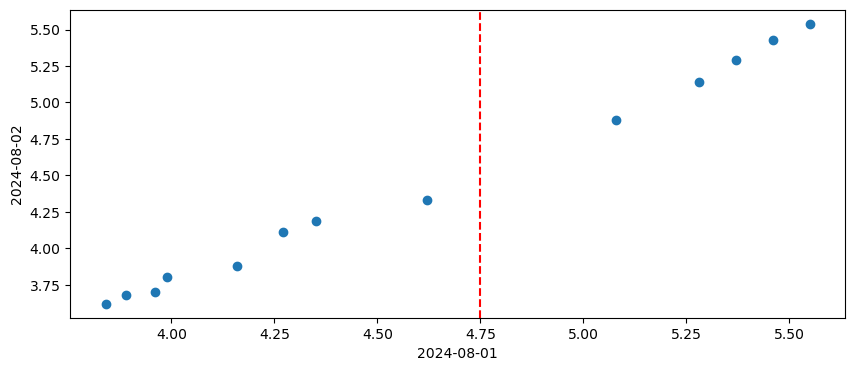

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df.iloc[0], df.iloc[1], marker ='o', linestyle="")
latest_day = df.index[0].strftime('%Y-%m-%d')
second_date = df.index[1].strftime('%Y-%m-%d')
plt.xlabel(f"{latest_day}")
plt.ylabel(f"{second_date}")
plt.axvline(4.75, color="r", linestyle="--")
plt.show()

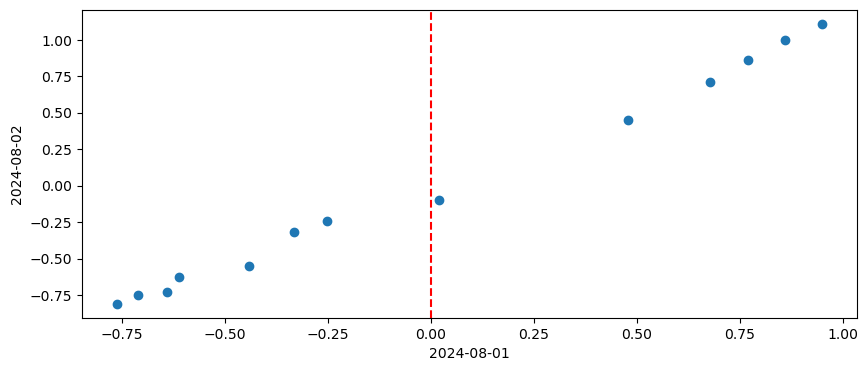

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df.iloc[0] - df.iloc[0].mean(), df.iloc[1] - df.iloc[1].mean(), marker ='o', linestyle="") #decrease the averages from the x-axis and y-axis which centers the points
latest_day = df.index[0].strftime('%Y-%m-%d')
second_date = df.index[1].strftime('%Y-%m-%d')
plt.xlabel(f"{latest_day}")
plt.ylabel(f"{second_date}")
plt.axvline(0,color='r', linestyle="--")
plt.show()

## The PCA

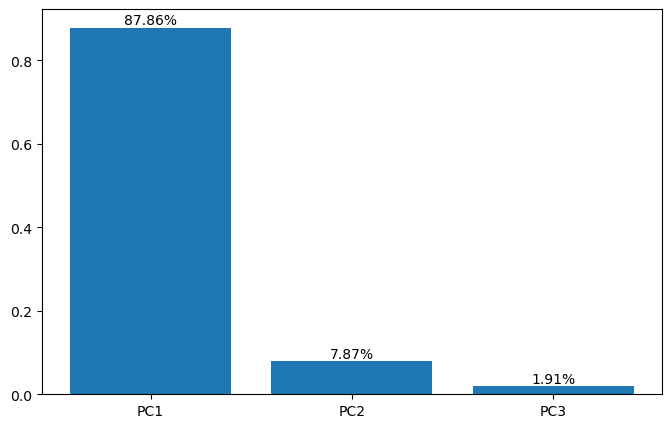

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\daily-treasury-rates.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df = df.dropna()

pca = PCA() #PCA is a class in which you can find the operations performed
pca.fit(df) #calculates the PCs of the data contained in df
explained_variance = pca.explained_variance_ratio_# array containing the proportion of variance associated with each principal component

# Scree plot for the top 3 PCs
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, 4), explained_variance[:3])
plt.xticks(range(1, 4), labels=[f'PC{i}' for i in range(1, 4)])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', 
             ha='center', va='bottom', fontsize=10, color='black')

## So the first 2 PCs are sufficient

In [6]:
loadings = pca.components_[:2] #loads are the standardised coefficients of the linear combination giving the PC

feature_names = df.columns #get the names of the columns
pc1_loadings = loadings[0] #first PC row
pc2_loadings = loadings[1] #second PC row

loadings_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1 Loading': pc1_loadings,
    'PC2 Loading': pc2_loadings
})

# Sort the DataFrames by the absolute values of loadings in descending order
pc1_sorted = loadings_df.sort_values(by='PC1 Loading', key=abs, ascending=False) #key=abs means I don't care + or - just the abs value see Loadings for PC2
pc2_sorted = loadings_df.sort_values(by='PC2 Loading', key=abs, ascending=False)

print("PC1")
print(pc1_sorted)
print()
print("PC2")
print(pc2_sorted)


PC1
   Feature  PC1 Loading  PC2 Loading
6     2 Yr     0.372969    -0.352300
8     5 Yr     0.358559     0.109643
9     7 Yr     0.357291     0.217821
7     3 Yr     0.354934    -0.358630
5     1 Yr     0.354302    -0.346727
10   10 Yr     0.316929     0.288440
11   20 Yr     0.290088     0.430101
12   30 Yr     0.288036     0.460204
4     6 Mo     0.231456    -0.243631
3     4 Mo     0.161332    -0.142793
2     3 Mo     0.055627    -0.065562
0     1 Mo     0.049965    -0.042493
1     2 Mo     0.020346     0.041955

PC2
   Feature  PC1 Loading  PC2 Loading
12   30 Yr     0.288036     0.460204
11   20 Yr     0.290088     0.430101
7     3 Yr     0.354934    -0.358630
6     2 Yr     0.372969    -0.352300
5     1 Yr     0.354302    -0.346727
10   10 Yr     0.316929     0.288440
4     6 Mo     0.231456    -0.243631
9     7 Yr     0.357291     0.217821
3     4 Mo     0.161332    -0.142793
8     5 Yr     0.358559     0.109643
2     3 Mo     0.055627    -0.065562
0     1 Mo     0.049965    -0

## **2 the loads and timed by the PCs, then added to see how much each factor contributes to the variance - this is what I thought (wrong?/right?)

In [7]:
loadings = pca.components_[:2]

feature_names = df.columns #get the names of the columns
pc1_loadings = loadings[0] **2 #weights of factors for PC1
pc2_loadings = loadings[1] **2 #weights of factors for PC2

loadings_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1 Loading': pc1_loadings,
    'PC2 Loading': pc2_loadings,
    "Overall impact (%)": (pc1_loadings*explained_variance[0] + pc2_loadings*explained_variance[1])*100
})

factor_sorted = loadings_df.sort_values(by='Overall impact (%)', ascending=False)
print(factor_sorted)

   Feature  PC1 Loading  PC2 Loading  Overall impact (%)
6     2 Yr     0.139106     0.124115           13.198863
7     3 Yr     0.125978     0.128615           12.080864
5     1 Yr     0.125530     0.120219           11.975386
9     7 Yr     0.127657     0.047446           11.589375
8     5 Yr     0.128565     0.012022           11.390271
10   10 Yr     0.100444     0.083198            9.479898
12   30 Yr     0.082965     0.211788            8.956500
11   20 Yr     0.084151     0.184987            8.849741
4     6 Mo     0.053572     0.059356            5.174083
3     4 Mo     0.026028     0.020390            2.447316
2     3 Mo     0.003094     0.004298            0.305710
0     1 Mo     0.002497     0.001806            0.233557
1     2 Mo     0.000414     0.001760            0.050229


## From here, we can say that the last 5 maturities can be dropped and not lose much variance in the data

## This was more of an exercise on using the PCA because either way, I need the top 3 PCs for the yield curve

## MOVING ON TO FORECASTING

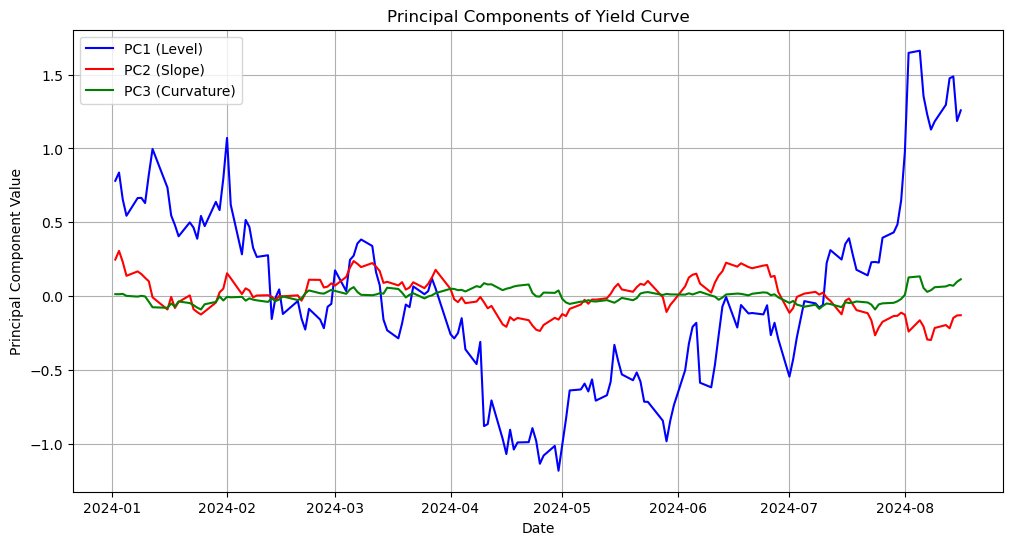

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\daily-treasury-rates-2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df=df.dropna()

pca = PCA(n_components=3)  # Capture top 3 PCs
principal_components = pca.fit_transform(df)

# DataFrame with values of the principal components over the days I have data on
pc_df = pd.DataFrame(principal_components, index=df.index, columns=['PC1', 'PC2', 'PC3'])

plt.figure(figsize=(12, 6))
plt.plot(pc_df.index, pc_df['PC1'], label='PC1 (Level)', color='blue')
plt.plot(pc_df.index, pc_df['PC2'], label='PC2 (Slope)', color='red')
plt.plot(pc_df.index, pc_df['PC3'], label='PC3 (Curvature)', color='green')
plt.title('Principal Components of Yield Curve')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
pc_df

,PC1,PC2,PC3
Date,,,
2024-08-16,1.257809,-0.130486,0.113201
2024-08-15,1.185649,-0.132122,0.096098
2024-08-14,1.487756,-0.149010,0.069345
2024-08-13,1.474971,-0.219034,0.074736
2024-08-12,1.295330,-0.197184,0.064621
...,...,...,...
2024-01-08,0.663598,0.166489,-0.004348
2024-01-05,0.543621,0.136527,0.000626
2024-01-04,0.654304,0.230783,0.014054


In [10]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f'{name} p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print(f'{name} is likely stationary.')
    else:
        print(f'{name} is likely non-stationary.')
    print('')

check_stationarity(pc_df['PC1'], 'PC1')
check_stationarity(pc_df['PC2'], 'PC2')
check_stationarity(pc_df['PC3'], 'PC3')

PC1 p-value: 0.2827
PC1 is likely non-stationary.

PC2 p-value: 0.1501
PC2 is likely non-stationary.

PC3 p-value: 0.0034
PC3 is likely stationary.



In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

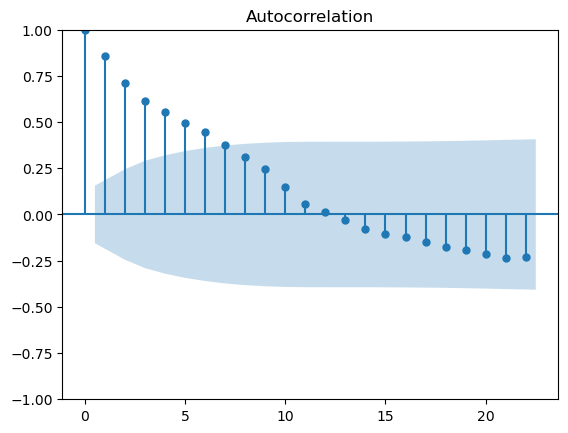

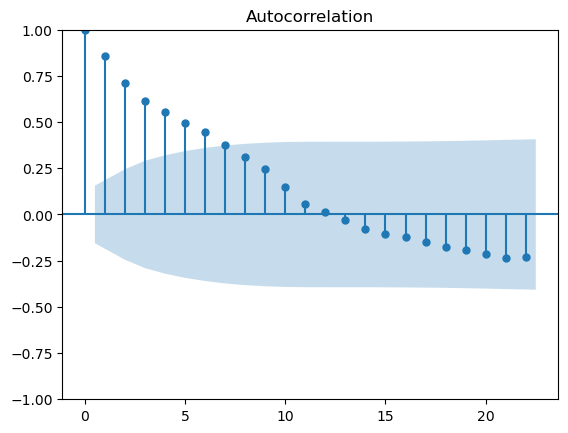

In [12]:
plot_acf(pc_df['PC3'])

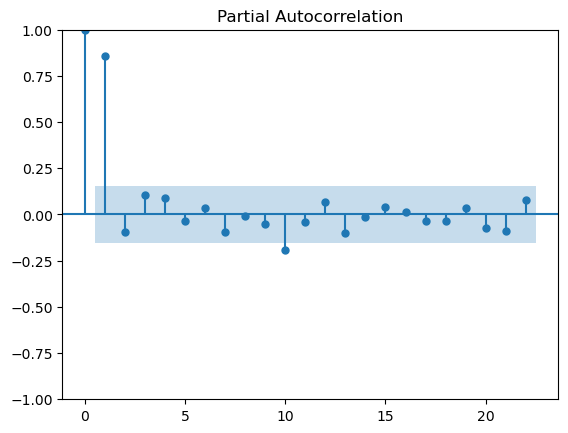

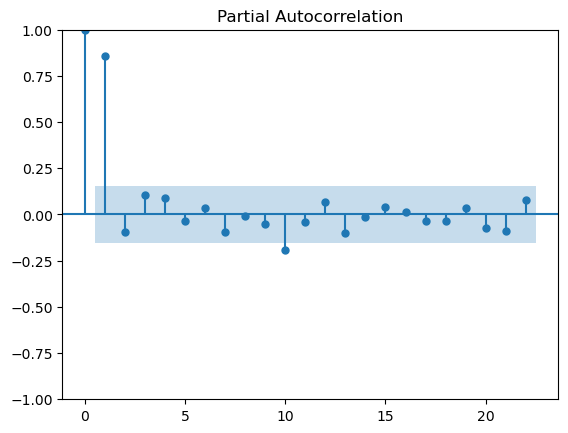

In [13]:
plot_pacf(pc_df['PC3'])

## PC3 (ARMA (1,7))

In [14]:
#pc_df['PC1'] = (pc_df['PC1'] - pc_df['PC1'].mean())  / pc_df['PC1'].std()
#pc_df['PC2'] = (pc_df['PC2'] - pc_df['PC2'].mean()) / pc_df['PC2'].std()

#check_stationarity(pc_df['PC1'], 'PC1') ----- not stationary
#check_stationarity(pc_df['PC2'], 'PC2') ----- not stationary

## So first diff for PC1 & 2

In [15]:
pc_df_diff = pc_df[['PC1', 'PC2']].diff().dropna()
pc_df_diff

,PC1,PC2
Date,,
2024-08-15,-0.072160,-0.001635
2024-08-14,0.302107,-0.016888
2024-08-13,-0.012785,-0.070024
2024-08-12,-0.179642,0.021850
2024-08-09,-0.112646,-0.019806
...,...,...
2024-01-08,-0.001120,0.018050
2024-01-05,-0.119977,-0.029962
2024-01-04,0.110683,0.094256


In [16]:
check_stationarity(pc_df_diff['PC1'], 'PC1.diff')
check_stationarity(pc_df_diff['PC2'], 'PC2.diff')

PC1.diff p-value: 0.0000
PC1.diff is likely stationary.

PC2.diff p-value: 0.0154
PC2.diff is likely stationary.



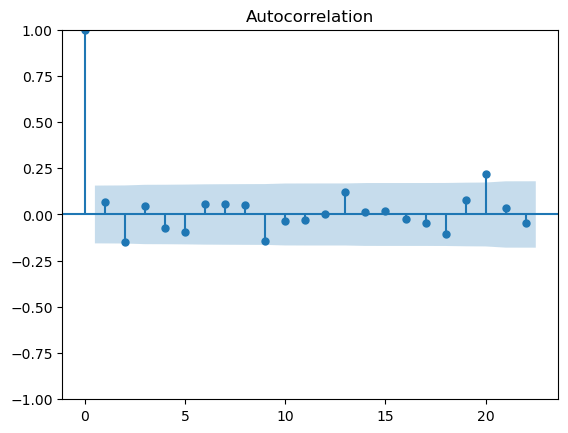

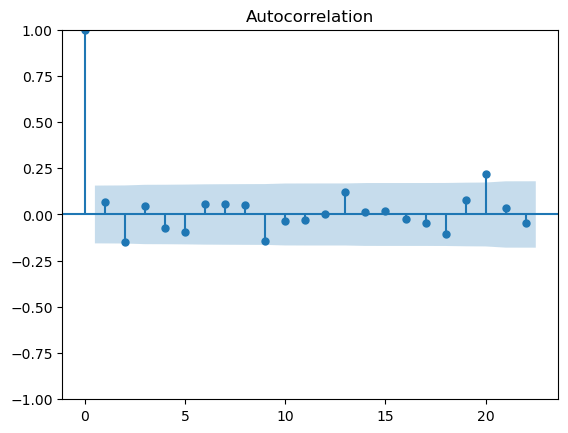

In [17]:
plot_acf(pc_df_diff['PC1'])

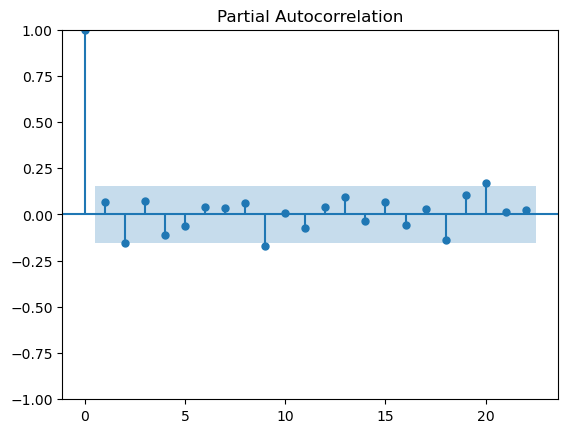

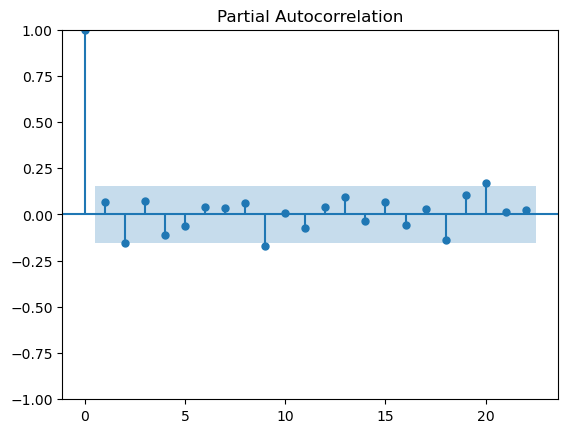

In [18]:
plot_pacf(pc_df_diff['PC1'])

## From a visual perspective it is not great because it implies an ARIMA(0,1,0) which is a random walk (for now PC1 ARIMA(0,1,0))

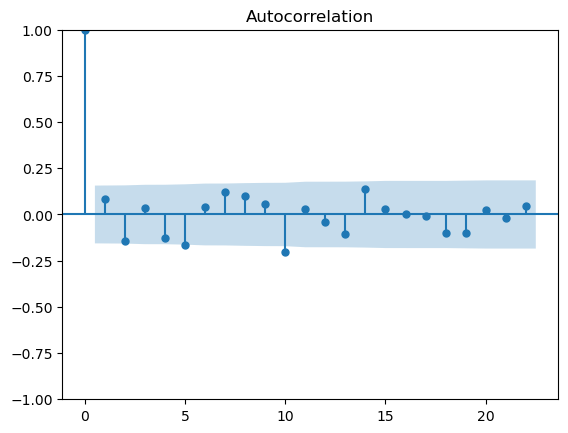

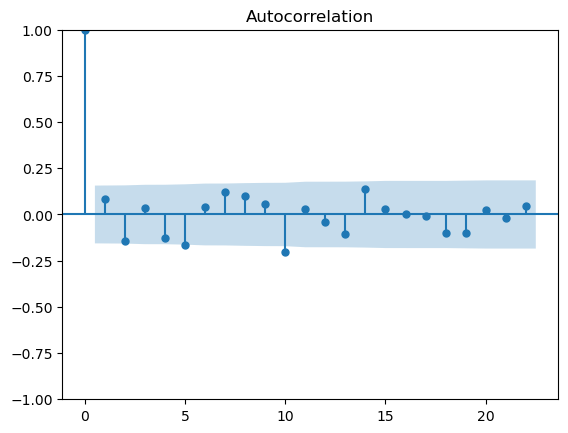

In [19]:
plot_acf(pc_df_diff['PC2'])

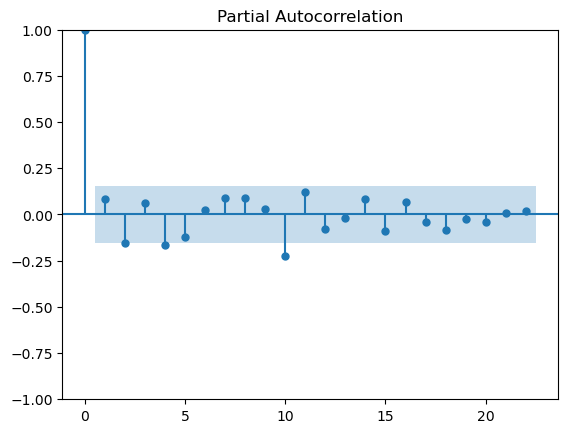

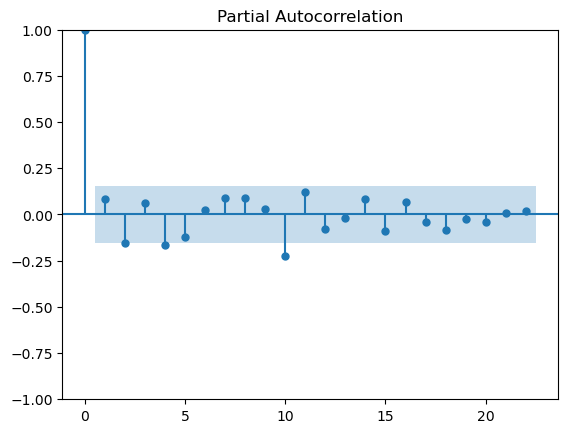

In [20]:
plot_pacf(pc_df_diff['PC2'])

## From a visual perspective it is not great because it implies an ARIMA(0,1,0) which is a random walk (for now PC2 ARIMA(0,1,0))

In [21]:
pc_df_diff

,PC1,PC2
Date,,
2024-08-15,-0.072160,-0.001635
2024-08-14,0.302107,-0.016888
2024-08-13,-0.012785,-0.070024
2024-08-12,-0.179642,0.021850
2024-08-09,-0.112646,-0.019806
...,...,...
2024-01-08,-0.001120,0.018050
2024-01-05,-0.119977,-0.029962
2024-01-04,0.110683,0.094256


In [22]:
pc_df_diff = pc_df_diff.asfreq(pd.infer_freq(pc_df_diff.index))
pc_df_diff_interpolated = pc_df_diff.interpolate(method='time')

from datetime import datetime
from datetime import timedelta

train_end = datetime(2024,7,14)
test_end = datetime(2024,8,15)

train_data = pc_df_diff_interpolated[:train_end] #dropna for the weekends 
test_data = pc_df_diff_interpolated[train_end + timedelta(days=1):test_end] #1 month

test_data

,PC1,PC2
Date,,
2024-07-15,-0.105782,-0.092307
2024-07-16,-0.038299,-0.015176
2024-07-17,0.110243,0.038862
2024-07-18,0.103412,0.039968
2024-07-19,0.037956,0.020782
2024-07-20,-0.004405,0.029990
2024-07-21,-0.046767,0.039197
2024-07-22,-0.089128,0.048405
2024-07-23,-0.002056,0.101499


In [23]:
model = ARIMA(train_data['PC1'], order=(10,1,10)) #here I yoloed it.....(probably too many coef so overfit), wanted BIC and tried but messed something up, will try again later
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    PC1   No. Observations:                  195
Model:               ARIMA(10, 1, 10)   Log Likelihood                 113.929
Date:                Tue, 20 Aug 2024   AIC                           -185.858
Time:                        05:02:36   BIC                           -117.233
Sample:                    01-02-2024   HQIC                          -158.070
                         - 07-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7460      0.242     -3.089      0.002      -1.219      -0.273
ar.L2         -0.6489      0.288     -2.256      0.024      -1.213      -0.085
ar.L3         -0.5764      0.355     -1.625      0.1

c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

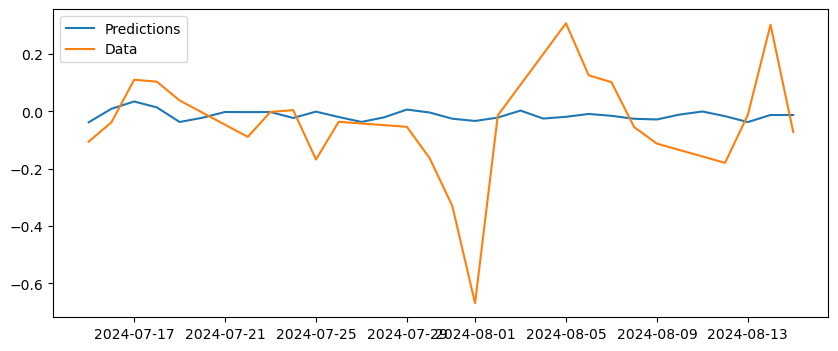

In [25]:
plt.figure(figsize=(10,4))
plt.plot(predictions,label="Predictions")
plt.plot(test_data["PC1"],label="Data")
plt.legend()
plt.show()

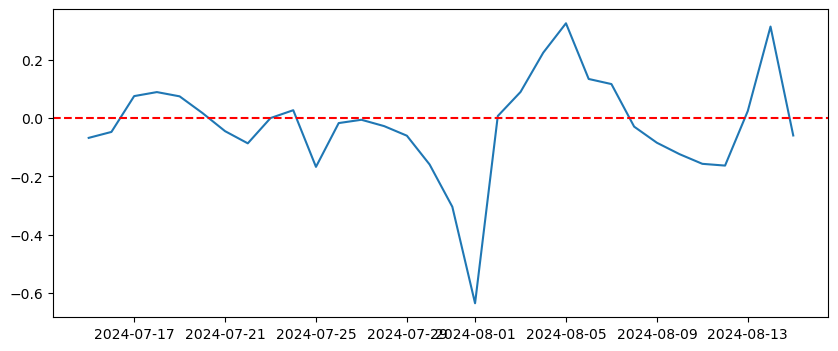

In [26]:
residuals = test_data['PC1'] - predictions
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, color="r", linestyle="--")
plt.show()

In [27]:
import numpy as np

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2))) #so on average I deviate by 0.17 (that is huge given the values we are dealing with)

Root Mean Squared Error: 0.173776398815294


## The model's arguments aren't great. Got to understand if there should be some autocorrelation for PCs.

In [28]:
rolling_predictions = pd.Series(index=test_data.index)

for i in test_data.index + timedelta(days=7):#give me the next week
    train_data = pc_df_diff_interpolated[:i-timedelta(days=1)]
    model = ARIMA(train_data['PC1'], order=(10,1,10))
    model_fit = model.fit()
    pred = model_fit.forecast()
    rolling_predictions.loc[i] = pred

c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Bogdan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bogdan\anaconda3\Lib\site-

c:\Users\Bogdan\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


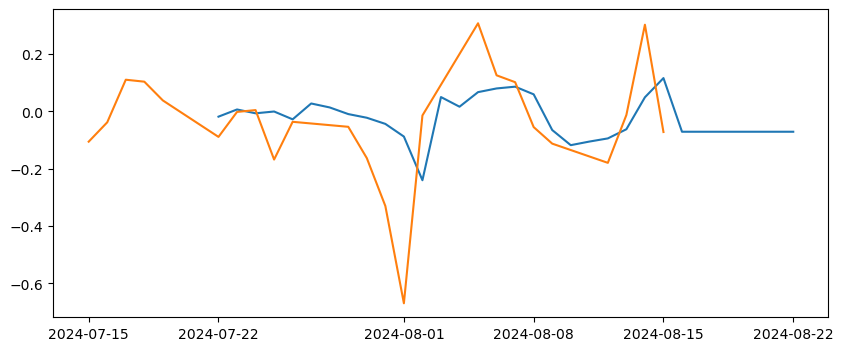

In [29]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.plot(test_data["PC1"])
plt.show()

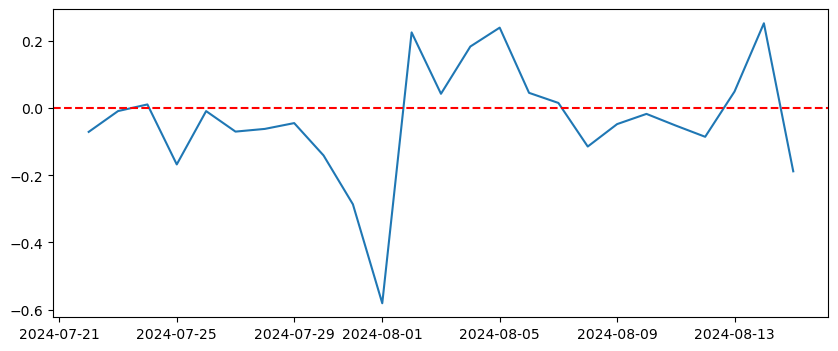

In [30]:
rolling_residuals= test_data['PC1'] - rolling_predictions[:-7]
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, color="r", linestyle='--')
plt.show()

In [31]:
print("Root mean squared error", np.sqrt(np.mean(rolling_residuals**2))) 

Root mean squared error 0.17411428108091417


## Not that different with rolling.....

In [32]:
initial_value = 1.185649  # PC1 on the 15/08/2024
predictions = np.array(rolling_predictions[-7:])
original_values = [initial_value]    
for diff in predictions:
    new_value = original_values[-1] + diff
    original_values.append(new_value)
    
PC1_predictions = np.array(original_values[1:])
print(PC1_predictions)


[[1.11447454]
 [1.04330008]
 [0.97212562]
 [0.90095115]
 [0.82977669]
 [0.75860223]
 [0.68742777]]


## As for the other PCs I can just mimic what I did for PC1. PC3 is ARIMA(1,0,7) and I don't have to come back to the original values that I actually need, but overall nothing special.

## Now I should have the predictions over the next week for PC 123 and I need to construct the forecasted yield curve (say tomorrow's yield curve)

In [33]:
df = pd.read_csv("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\daily-treasury-rates.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df = df.asfreq(pd.infer_freq(df.index))
df = df.dropna()
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2024-08-01,5.55,5.46,5.37,5.28,5.08,4.62,4.16,3.96,3.84,3.89,3.99,4.35,4.27
2024-08-02,5.54,5.43,5.29,5.14,4.88,4.33,3.88,3.70,3.62,3.68,3.80,4.19,4.11
2024-08-05,5.52,5.43,5.35,5.14,4.91,4.34,3.89,3.71,3.62,3.66,3.78,4.16,4.06
2024-08-06,5.50,5.43,5.34,5.18,5.00,4.46,3.99,3.76,3.73,3.79,3.90,4.28,4.18
2024-08-07,5.50,5.43,5.34,5.21,4.99,4.45,4.00,3.81,3.79,3.85,3.96,4.35,4.26
2024-08-08,5.55,5.42,5.34,5.21,5.01,4.48,4.04,3.86,3.83,3.89,3.99,4.38,4.28
2024-08-09,5.54,5.40,5.33,5.22,5.02,4.50,4.05,3.86,3.80,3.85,3.94,4.33,4.23
2024-08-12,5.53,5.40,5.33,5.20,5.02,4.47,4.01,3.82,3.75,3.80,3.90,4.30,4.19
2024-08-13,5.48,5.39,5.32,5.18,4.97,4.40,3.93,3.75,3.68,3.74,3.85,4.25,4.16


need the mean of each maturity

In [34]:
mean_yield_curve = np.array(df.mean())
print(mean_yield_curve)

[5.52166667 5.415      5.33333333 5.2        4.995      4.45666667
 4.0025     3.81333333 3.74083333 3.7925     3.89583333 4.27916667
 4.1825    ]


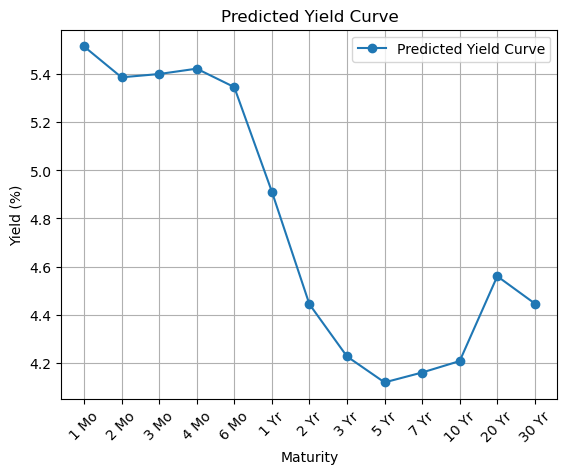

In [35]:
pca = PCA()
pca.fit(df) #calculates the PCs of the data contained in df

loadings = pca.components_[:3]
predicted_pcs = np.array([1.11447454, -0.130486, 0.113201]) #the PC1 is ok the rest are the latest values (to be replaced once the mimicing work is done)

reconstructed_yield_curve = (
    predicted_pcs[0] * loadings[0] +  # Contribution from PC1
    predicted_pcs[1] * loadings[1] +  # Contribution from PC2
    predicted_pcs[2] * loadings[2]    # Contribution from PC3
)

reconstructed_yield_curve += mean_yield_curve #because u centred points

maturities = df.columns

plt.plot(maturities, reconstructed_yield_curve, marker='o', label='Predicted Yield Curve')
plt.title('Predicted Yield Curve')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Interpolate to make it smooth. I'm not sure if it's helpful.

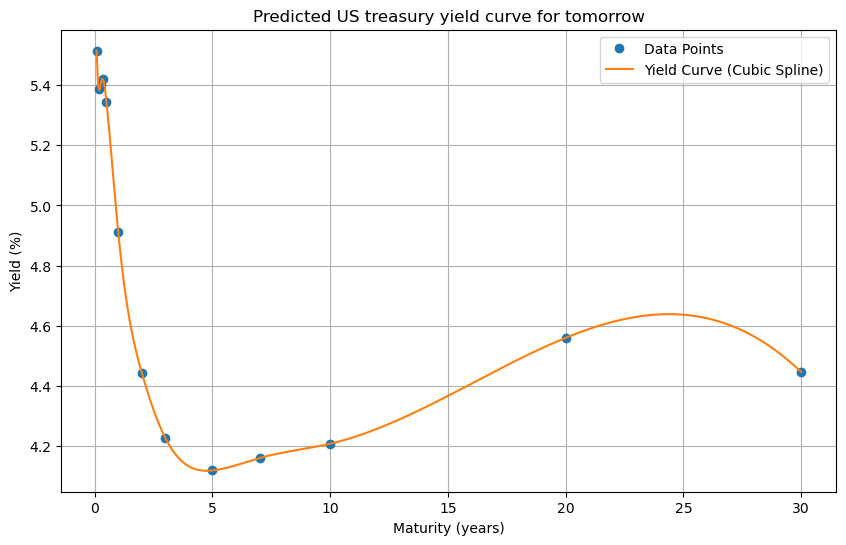

In [36]:
from scipy.interpolate import CubicSpline

maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])  # Maturities in years

cs = CubicSpline(maturities, reconstructed_yield_curve) #creates polynomials for each interval between the observed points and I mean it derives the parameters and all so basically the intervals are modelled as the result of a polynomial specific to the interval

maturities_smooth = np.linspace(min(maturities), max(maturities), 500) #create 500 points between the two values and these points are equally spaced
reconstructed_yields_smooth = cs(maturities_smooth) #pass the points and interpolate them for their respective values

plt.figure(figsize=(10, 6))
plt.plot(maturities, reconstructed_yield_curve, 'o', label='Data Points') #'o' = circle
plt.plot(maturities_smooth, reconstructed_yields_smooth, '-', label='Yield Curve (Cubic Spline)') #plot the interpolated values
plt.title('Predicted US treasury yield curve for tomorrow')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

## Now the point of all of this was to compare to current values

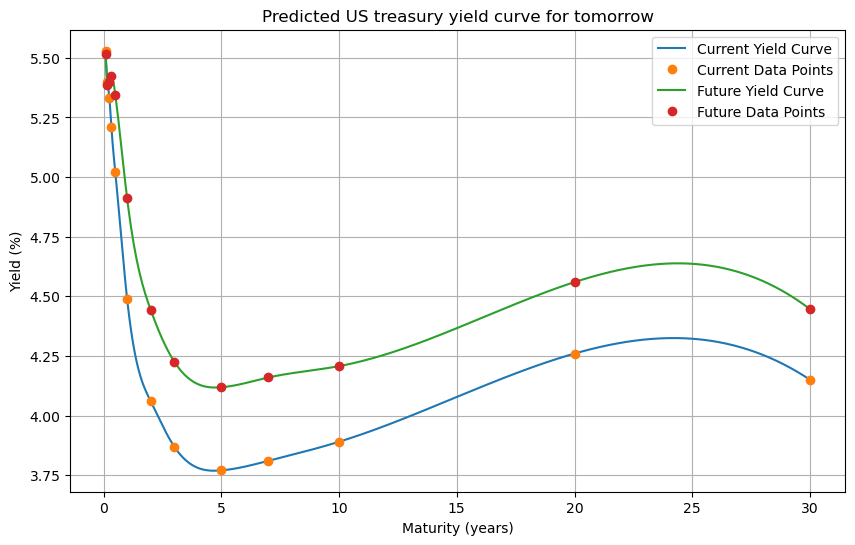

In [37]:
maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
latest_date = df.index.max()
yields_latest = np.array(df.loc[latest_date])
cs = CubicSpline(maturities, yields_latest)
maturities_smooth = np.linspace(min(maturities), max(maturities), 500)
yields_smooth = cs(maturities_smooth)



plt.figure(figsize=(10, 6))
plt.plot(maturities_smooth, yields_smooth, label="Current Yield Curve")
plt.plot(maturities, yields_latest, 'o', label='Current Data Points')
plt.plot(maturities_smooth, reconstructed_yields_smooth, '-', label='Future Yield Curve')
plt.plot(maturities, reconstructed_yield_curve, 'o', label='Future Data Points')
plt.title('Predicted US treasury yield curve for tomorrow')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

## I need to analyse the relationships between PCs and variables to identify what variables are predictors:
## PC1 (Parallel shift): inflation, GDP growth, central bank rates
## PC2 (Slope): expectations of future interest rates, central bank policy changes, and economic growth outlook
## PC3 (Curvature): expectations of interest rate volatility, risk sentiment, and supply-demand dynamics in different segments of the yield curve

## And I need data on swaps to calculate a butterfly’s total net impact = the butterfly’s carry + the butterfly’s roll down. Apparently, since I am no longer a Warwick student, I no longer have access to Bloomberg and pretty much every campus facility :))))).

## Suppose I wanted a butterfly using treasuries.

In [38]:
def percentage_change(array1, array2):
    return [(new - old) / old * 100 for old, new in zip(array1, array2)]

array1 = yields_latest
array2 = reconstructed_yield_curve

result = percentage_change(array1, array2)
print(result) #give me the % change for all maturities

[-0.27648334136237535, -0.25527881521348594, 1.3110534449009668, 4.071738623461027, 6.485199460578701, 9.38852918578051, 9.442951766566708, 9.20889658686871, 9.244483030508682, 9.175373878932119, 8.153732995097664, 7.0332485064162205, 7.134123796939069]


In [39]:
maturities = np.array(['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'])
result = np.array(result)

df = pd.DataFrame({
    'Maturity': maturities,
    'Percentage Change in Yield (%)': result
})

df_sorted = df.sort_values(by='Percentage Change in Yield (%)', ascending=True)

df_sorted

,Maturity,Percentage Change in Yield (%)
0,1 Mo,-0.276483
1,2 Mo,-0.255279
2,3 Mo,1.311053
3,4 Mo,4.071739
4,6 Mo,6.485199
11,20 Yr,7.033249
12,30 Yr,7.134124
10,10 Yr,8.153733
9,7 Yr,9.175374
7,3 Yr,9.208897


## So, I want to short the 2Y twice, long the 1 MO once and long the 20Y once. Yield and price have an inverse relationship. And didn't consider maturities in between the ones given in the data from the U.S. Department of the Treasury. This is the optimal butterfly for a holding period of 1 day. For 6 months, I need to forecast the PCs over 6 months and that might pose challenges at this very second given the current inaccuracy for a 1-month holding period.

## The PC1 & 2 ARIMA orders bother me the most because the pacfs and the acfs aren't great. 